### Company Sales Analysis

This workbook aims to analyse order/sales data from 2019 for a fictitious company to help provide insight into their overall sales and orders.

Below are the questions which I have looked to answer;

Q. What product sold the most by quantity? Why do you think it sold the most?

Q. What product had the highest total revenue? Why do you think it sold the most?

Q. What was the best month for sales? How much was earned that month?

Q. What city sold the most product?

Q. What time should we display advertisements to maximize the likelihood of customers buying the products?

Q. What products are most often sold together?

This notebook has been tidied up since completing this project and does not represent the exact processes and steps that were used during this analysis. Some of the workings and test code has been removed.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

%config Completer.use_jedi = False

In [2]:
import os
from pathlib import Path

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### Collated and Cleaned Data

In [4]:
df = pd.DataFrame()

In [5]:
a = './Sales_Data'

In [6]:
for file in os.listdir(a):
    if 'Sales_' in file:
        print(file)
        sales = pd.read_csv(Path(a,file))
        df = pd.concat(objs = [df, sales])

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [7]:
df.set_index('Order ID', inplace = True)

In [8]:
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 176558 to 259357
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           186305 non-null  object
 1   Quantity Ordered  186305 non-null  object
 2   Price Each        186305 non-null  object
 3   Order Date        186305 non-null  object
 4   Purchase Address  186305 non-null  object
dtypes: object(5)
memory usage: 8.6+ MB


(186850, 5)

In [9]:
df.to_csv('./Output/AllMonthData.csv')

In [10]:
#cd = combine data for all months
cd = pd.read_csv('./Output/AllMonthData.csv', index_col = 'Order ID')
cd.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
NaN,NaN,NaN,NaN,NaN,NaN
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [11]:
#Remove rows with 'Order ID' in the index. These rows are basically repeating columns
#headings that are includes in the imported data
cd = cd.drop('Order ID', axis = 0)

In [12]:
#Indicating that the rogue'Order ID' have been removed
'Order ID' in cd.index

False

In [13]:
cd['Quantity Ordered'].unique()

array(['2', nan, '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [14]:
cd['Product'].unique()

array(['USB-C Charging Cable', nan, 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [15]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186495 entries, 176558 to 259357
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           185950 non-null  object
 1   Quantity Ordered  185950 non-null  object
 2   Price Each        185950 non-null  object
 3   Order Date        185950 non-null  object
 4   Purchase Address  185950 non-null  object
dtypes: object(5)
memory usage: 13.5+ MB


In [16]:
cd.describe()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950
unique,19,9,23,142395,140787
top,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,21903,168552,21903,8,9


In [17]:
cd['Order Date'] = pd.to_datetime(cd['Order Date'])

In [18]:
cd['Product'] = cd['Product'].astype('category')

In [19]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186495 entries, 176558 to 259357
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185950 non-null  category      
 1   Quantity Ordered  185950 non-null  object        
 2   Price Each        185950 non-null  object        
 3   Order Date        185950 non-null  datetime64[ns]
 4   Purchase Address  185950 non-null  object        
dtypes: category(1), datetime64[ns](1), object(3)
memory usage: 12.3+ MB


In [20]:
cd['Price Each']

Order ID
176558     11.95
NaN          NaN
176559     99.99
176560       600
176560     11.99
           ...  
259353      2.99
259354       700
259355       700
259356    379.99
259357     11.95
Name: Price Each, Length: 186495, dtype: object

In [21]:
cd['Price Each'] = cd['Price Each'].astype('float')

In [22]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186495 entries, 176558 to 259357
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185950 non-null  category      
 1   Quantity Ordered  185950 non-null  object        
 2   Price Each        185950 non-null  float64       
 3   Order Date        185950 non-null  datetime64[ns]
 4   Purchase Address  185950 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 12.3+ MB


In [23]:
cd.dropna(inplace = True)

In [24]:
cd.sort_index()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...
319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"


In [25]:
cd['Quantity Ordered'] = cd['Quantity Ordered'].astype('int64')

In [26]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 176558 to 259357
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185950 non-null  category      
 1   Quantity Ordered  185950 non-null  int64         
 2   Price Each        185950 non-null  float64       
 3   Order Date        185950 non-null  datetime64[ns]
 4   Purchase Address  185950 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 7.3+ MB


In [27]:
cd.describe()

,Quantity Ordered,Price Each
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


In [28]:
OrderValue = cd['Quantity Ordered'] * cd['Price Each']
cd.insert(3, 'Order Value', OrderValue)

In [29]:
cd

,Product,Quantity Ordered,Price Each,Order Value,Order Date,Purchase Address
Order ID,,,,,,
176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"


### Q. What product sold the most by quantity? Why do you think it sold the most?

In [30]:
cd

,Product,Quantity Ordered,Price Each,Order Value,Order Date,Purchase Address
Order ID,,,,,,
176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"


In [31]:
#pp = product price
pp = cd[['Product','Price Each']].drop_duplicates().set_index('Product')
pp

,Price Each
Product,
USB-C Charging Cable,11.95
Bose SoundSport Headphones,99.99
Google Phone,600.00
Wired Headphones,11.99
Macbook Pro Laptop,1700.00
Lightning Charging Cable,14.95
27in 4K Gaming Monitor,389.99
AA Batteries (4-pack),3.84
Apple Airpods Headphones,150.00


In [32]:
#prodsales = product sales
prodsales = cd.pivot_table(values= ['Quantity Ordered', 'Order Value'], index = 'Product', aggfunc = sum)
prodsales.rename(columns={'Order Value': 'Total Revenue', 'Quantity Ordered': 'Total Units Sold'}, inplace = True )

In [33]:
prodsales = pd.merge(left = prodsales, right = pp, how = 'left', left_index= True, right_index= True)
prodsales

,Total Revenue,Total Units Sold,Price Each
Product,,,
20in Monitor,454148.71,4129,109.99
27in 4K Gaming Monitor,2435097.56,6244,389.99
27in FHD Monitor,1132424.50,7550,149.99
34in Ultrawide Monitor,2355558.01,6199,379.99
AA Batteries (4-pack),106118.40,27635,3.84
AAA Batteries (4-pack),92740.83,31017,2.99
Apple Airpods Headphones,2349150.00,15661,150.00
Bose SoundSport Headphones,1345565.43,13457,99.99
Flatscreen TV,1445700.00,4819,300.00


In [34]:
prodsales.sort_values(by = 'Total Units Sold', ascending = False)

,Total Revenue,Total Units Sold,Price Each
Product,,,
AAA Batteries (4-pack),92740.83,31017,2.99
AA Batteries (4-pack),106118.40,27635,3.84
USB-C Charging Cable,286501.25,23975,11.95
Lightning Charging Cable,347094.15,23217,14.95
Wired Headphones,246478.43,20557,11.99
Apple Airpods Headphones,2349150.00,15661,150.00
Bose SoundSport Headphones,1345565.43,13457,99.99
27in FHD Monitor,1132424.50,7550,149.99
iPhone,4794300.00,6849,700.00


A. The products with the highest quantity of units sold were batteries followed by cables then headphones. 

This could be due to the low retail price resulting in a higher number purchased. These are also products that people normally repeatedly buy.

Additionally, both cables and headphones were also the products that were most likely to be purchased in conjunction with phone sales. (from analysis listed below)

### Q. What product had the highest total revenue? Why do you think it sold the most?

In [35]:
#tr = total revenue
tr = prodsales.sort_values(by = 'Total Revenue', ascending = False)
tr

,Total Revenue,Total Units Sold,Price Each
Product,,,
Macbook Pro Laptop,8037600.00,4728,1700.00
iPhone,4794300.00,6849,700.00
ThinkPad Laptop,4129958.70,4130,999.99
Google Phone,3319200.00,5532,600.00
27in 4K Gaming Monitor,2435097.56,6244,389.99
34in Ultrawide Monitor,2355558.01,6199,379.99
Apple Airpods Headphones,2349150.00,15661,150.00
Flatscreen TV,1445700.00,4819,300.00
Bose SoundSport Headphones,1345565.43,13457,99.99


<AxesSubplot:title={'center':'Total Revenue Per Item'}, xlabel='Product', ylabel='Sales in Millions $'>

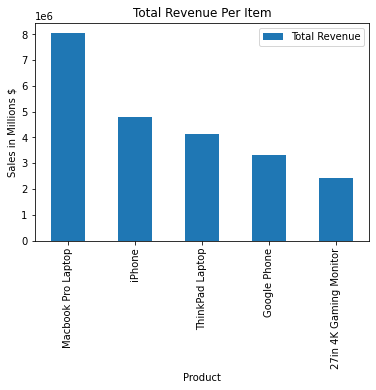

In [36]:
tr.head(5).plot(kind = 'bar', y = 'Total Revenue', ylabel = 'Sales in Millions $', title = 'Total Revenue Per Item')

A. The product with the highest total revenue was a MacBook Pro Laptop.

Reasons for it having the highest revenue could be because it is perceived to be a high quality desirable product. This combine with it's high price (the highest of all items sold) and relatively mid-range level of sales compared to other items (excluding batteries, cables and headphones) may have resulted in it generating the highest level of total revenue.


### Q. What was the best month for sales? How much was earned that month?

In [37]:
cd

,Product,Quantity Ordered,Price Each,Order Value,Order Date,Purchase Address
Order ID,,,,,,
176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"


In [38]:
cd.iloc[0, 4].month_name()

'April'

In [39]:
MonthName = cd['Order Date'].apply(lambda x: x.month_name())

In [40]:
cd.insert(5, 'Month Name', MonthName)
cd['Month Name'] = cd['Month Name'].astype('category')

In [41]:
cd

,Product,Quantity Ordered,Price Each,Order Value,Order Date,Month Name,Purchase Address
Order ID,,,,,,,
176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,April,"917 1st St, Dallas, TX 75001"
176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,April,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,April,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,April,"669 Spruce St, Los Angeles, CA 90001"
176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,April,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...,...
259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,September,"840 Highland St, Los Angeles, CA 90001"
259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,September,"216 Dogwood St, San Francisco, CA 94016"
259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,September,"220 12th St, San Francisco, CA 94016"


In [42]:
cd.sort_index(inplace = True)

In [43]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 141234 to 319670
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185950 non-null  category      
 1   Quantity Ordered  185950 non-null  int64         
 2   Price Each        185950 non-null  float64       
 3   Order Value       185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Month Name        185950 non-null  category      
 6   Purchase Address  185950 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 8.9+ MB


In [44]:
cd

,Product,Quantity Ordered,Price Each,Order Value,Order Date,Month Name,Purchase Address
Order ID,,,,,,,
141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,January,"944 Walnut St, Boston, MA 02215"
141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,January,"185 Maple St, Portland, OR 97035"
141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,January,"538 Adams St, San Francisco, CA 94016"
141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,January,"738 10th St, Los Angeles, CA 90001"
141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,January,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...
319666,Lightning Charging Cable,1,14.95,14.95,2019-12-11 20:58:00,December,"14 Madison St, San Francisco, CA 94016"
319667,AA Batteries (4-pack),2,3.84,7.68,2019-12-01 12:01:00,December,"549 Willow St, Los Angeles, CA 90001"
319668,Vareebadd Phone,1,400.00,400.00,2019-12-09 06:43:00,December,"273 Wilson St, Seattle, WA 98101"


In [45]:
Month_Sales = cd.pivot_table(values = 'Order Value', index = 'Month Name', aggfunc= sum)

In [46]:
Month_Sales['Order Value In Millions'] = Month_Sales['Order Value']/1000000

In [47]:
Month_Sales

,Order Value,Order Value In Millions
Month Name,,
April,3.390670e+06,3.390670
August,2.244468e+06,2.244468
December,4.613443e+06,4.613443
February,2.202022e+06,2.202022
January,1.822257e+06,1.822257
July,2.647776e+06,2.647776
June,2.577802e+06,2.577802
March,2.807100e+06,2.807100
May,3.152607e+06,3.152607


In [48]:
monthmap = {'January': 1,
'February': 2,
'March':3,
'April': 4,
'May':5,
'June':6,
'July':7,
'August':8,
'September':9,
'October':10,
'November': 11,
'December': 12}

In [49]:
Month_Sales['Month Number'] = Month_Sales.index.to_series().map(monthmap)

In [50]:
Month_Sales

,Order Value,Order Value In Millions,Month Number
Month Name,,,
April,3.390670e+06,3.390670,4
August,2.244468e+06,2.244468,8
December,4.613443e+06,4.613443,12
February,2.202022e+06,2.202022,2
January,1.822257e+06,1.822257,1
July,2.647776e+06,2.647776,7
June,2.577802e+06,2.577802,6
March,2.807100e+06,2.807100,3
May,3.152607e+06,3.152607,5


In [51]:
ms = Month_Sales['Order Value In Millions'].sort_values(ascending = False)
ms

Month Name
December     4.613443
October      3.736727
April        3.390670
November     3.199603
May          3.152607
March        2.807100
July         2.647776
June         2.577802
August       2.244468
February     2.202022
September    2.097560
January      1.822257
Name: Order Value In Millions, dtype: float64

<AxesSubplot:title={'center':'Sales per month from highest to lowest'}, xlabel='Month Name', ylabel='Sales in Millions $'>

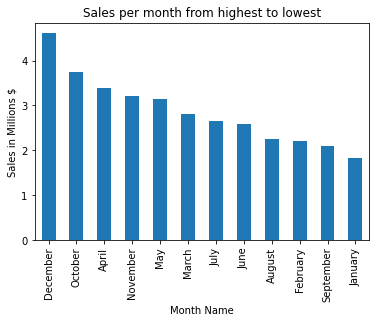

In [52]:
ms.plot(kind = 'bar', ylabel = 'Sales in Millions $', title = 'Sales per month from highest to lowest')

In [53]:
mstime = Month_Sales.iloc[:, 1:]
mstime['Month Number'] = mstime.loc[:, 'Month Number'].astype('int64')
mstime.sort_values(by = 'Month Number', inplace = True)
mstime

,Order Value In Millions,Month Number
Month Name,,
January,1.822257,1
February,2.202022,2
March,2.807100,3
April,3.390670,4
May,3.152607,5
June,2.577802,6
July,2.647776,7
August,2.244468,8
September,2.097560,9


<AxesSubplot:title={'center':'Sales per month'}, xlabel='Month Name', ylabel='Sales in Millions $'>

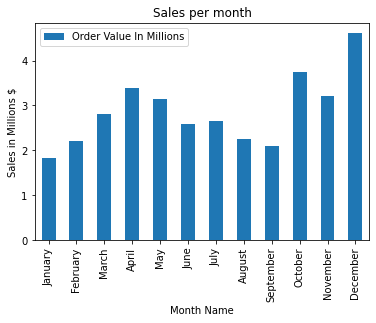

In [54]:
mstime.plot(kind = 'bar', y = 'Order Value In Millions', ylabel = 'Sales in Millions $', title = 'Sales per month')

A. The best month for sales was December 2019, with a total amount of sales of $4.613 million.

### Q. What city sold the most product?

In [55]:
cd

,Product,Quantity Ordered,Price Each,Order Value,Order Date,Month Name,Purchase Address
Order ID,,,,,,,
141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,January,"944 Walnut St, Boston, MA 02215"
141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,January,"185 Maple St, Portland, OR 97035"
141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,January,"538 Adams St, San Francisco, CA 94016"
141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,January,"738 10th St, Los Angeles, CA 90001"
141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,January,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...
319666,Lightning Charging Cable,1,14.95,14.95,2019-12-11 20:58:00,December,"14 Madison St, San Francisco, CA 94016"
319667,AA Batteries (4-pack),2,3.84,7.68,2019-12-01 12:01:00,December,"549 Willow St, Los Angeles, CA 90001"
319668,Vareebadd Phone,1,400.00,400.00,2019-12-09 06:43:00,December,"273 Wilson St, Seattle, WA 98101"


In [56]:
cd['Purchase Address'].head(10)

Order ID
141234            944 Walnut St, Boston, MA 02215
141235           185 Maple St, Portland, OR 97035
141236      538 Adams St, San Francisco, CA 94016
141237         738 10th St, Los Angeles, CA 90001
141238              387 10th St, Austin, TX 73301
141239     775 Willow St, San Francisco, CA 94016
141240         979 Park St, Los Angeles, CA 90001
141241        181 6th St, San Francisco, CA 94016
141242       867 Willow St, Los Angeles, CA 90001
141243    657 Johnson St, San Francisco, CA 94016
Name: Purchase Address, dtype: object

In [57]:
PurAdd = cd.loc['141234', 'Purchase Address']
PurAdd

'944 Walnut St, Boston, MA 02215'

In [58]:
def GetCity(x):
    city = x.split(',')[1].strip()
    #print(city)
    
    #ac = area code
    ac = x.split(',')[2].strip()
    ac = ac.split(' ')[0]
    #print(ac)
    
    return F"{city} ({ac})"
    
GetCity(PurAdd)

'Boston (MA)'

In [59]:
city = cd['Purchase Address'].apply(GetCity)
city

Order ID
141234           Boston (MA)
141235         Portland (OR)
141236    San Francisco (CA)
141237      Los Angeles (CA)
141238           Austin (TX)
                 ...        
319666    San Francisco (CA)
319667      Los Angeles (CA)
319668          Seattle (WA)
319669           Dallas (TX)
319670      Los Angeles (CA)
Name: Purchase Address, Length: 185950, dtype: object

In [60]:
city.unique()

array(['Boston (MA)', 'Portland (OR)', 'San Francisco (CA)',
       'Los Angeles (CA)', 'Austin (TX)', 'Atlanta (GA)', 'Seattle (WA)',
       'New York City (NY)', 'Dallas (TX)', 'Portland (ME)'], dtype=object)

In [61]:
cd['City'] = city
cd['City'] = cd['City'].astype('category')

In [62]:
cd

,Product,Quantity Ordered,Price Each,Order Value,Order Date,Month Name,Purchase Address,City
Order ID,,,,,,,,
141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,January,"944 Walnut St, Boston, MA 02215",Boston (MA)
141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,January,"185 Maple St, Portland, OR 97035",Portland (OR)
141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,January,"538 Adams St, San Francisco, CA 94016",San Francisco (CA)
141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,January,"738 10th St, Los Angeles, CA 90001",Los Angeles (CA)
141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,January,"387 10th St, Austin, TX 73301",Austin (TX)
...,...,...,...,...,...,...,...,...
319666,Lightning Charging Cable,1,14.95,14.95,2019-12-11 20:58:00,December,"14 Madison St, San Francisco, CA 94016",San Francisco (CA)
319667,AA Batteries (4-pack),2,3.84,7.68,2019-12-01 12:01:00,December,"549 Willow St, Los Angeles, CA 90001",Los Angeles (CA)
319668,Vareebadd Phone,1,400.00,400.00,2019-12-09 06:43:00,December,"273 Wilson St, Seattle, WA 98101",Seattle (WA)


In [63]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 141234 to 319670
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Product           185950 non-null  category      
 1   Quantity Ordered  185950 non-null  int64         
 2   Price Each        185950 non-null  float64       
 3   Order Value       185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Month Name        185950 non-null  category      
 6   Purchase Address  185950 non-null  object        
 7   City              185950 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 14.0+ MB


In [64]:
CitySales = cd.pivot_table(values = 'Order Value', index = 'City', aggfunc= sum)

In [65]:
CitySales['Order Value In Millions'] = CitySales['Order Value']/1000000

In [66]:
CitySales.sort_values(by = 'Order Value In Millions', ascending= False, inplace = True)
CitySales

,Order Value,Order Value In Millions
City,,
San Francisco (CA),8.262204e+06,8.262204
Los Angeles (CA),5.452571e+06,5.452571
New York City (NY),4.664317e+06,4.664317
Boston (MA),3.661642e+06,3.661642
Atlanta (GA),2.795499e+06,2.795499
Dallas (TX),2.767975e+06,2.767975
Seattle (WA),2.747755e+06,2.747755
Portland (OR),1.870732e+06,1.870732
Austin (TX),1.819582e+06,1.819582


<AxesSubplot:title={'center':'Sales per city'}, xlabel='City', ylabel='Sales in Millions $'>

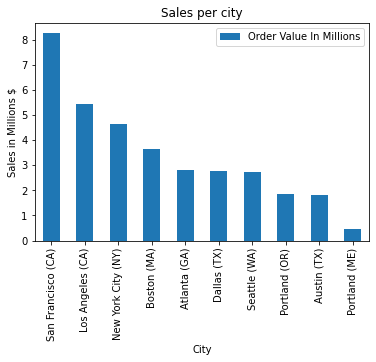

In [67]:
CitySales.plot(kind = 'bar', y = 'Order Value In Millions', ylabel = 'Sales in Millions $', title = 'Sales per city')

A. The city which sold the most product was San Francisco with a total of $8.262 million in sales

### Q. What time should we display advertisements to maximize the likelihood of customers buying the products?

In the first instance, plotted the graph in minutes to get the most accurate result

In [68]:
#sm = Sales Minute
sm = cd['Order Date']
sm = sm.to_frame()
sm

,Order Date
Order ID,
141234,2019-01-22 21:25:00
141235,2019-01-28 14:15:00
141236,2019-01-17 13:33:00
141237,2019-01-05 20:33:00
141238,2019-01-25 11:59:00
...,...
319666,2019-12-11 20:58:00
319667,2019-12-01 12:01:00
319668,2019-12-09 06:43:00


Had difficulty plotting timestamps in matplotlib therefore converted the time of sales to minutes and then plotted minutes on the x axis instead

In [69]:
x = sm.iloc[0,0]
x

Timestamp('2019-01-22 21:25:00')

In [70]:
def totalminutes(x):
    tt = (x.hour * 60) + x.minute
    return tt

In [71]:
totalminutes(x)

1285

In [72]:
#tm = total minutes
sm['tm'] = sm['Order Date'].apply(totalminutes)

In [73]:
#Total minutes value counts
tmvc = sm['tm'].value_counts()
tmvc

718     252
1160    246
1155    243
1213    242
741     240
       ... 
283       8
227       7
203       7
263       6
245       5
Name: tm, Length: 1440, dtype: int64

In [74]:
tmvc.sort_index(inplace = True)

Created hour labels to be used for plotting on the x axis

In [75]:
labels = []
for i in range(25):
    labels.append(i)
    
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [76]:
x = range(0,1441,60)

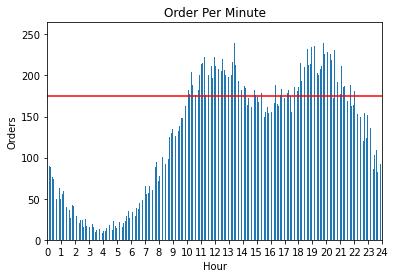

In [77]:
tmvc.plot(kind='bar', xlabel = 'Hour', ylabel = 'Orders', title = 'Order Per Minute')
plt.xticks(x,labels, rotation = 'horizontal')
plt.axhline(y = 175, color = 'r')
plt.show()

Version of graph in hours

In [78]:
hoursales = cd['Order Date'].apply(lambda x: x.hour).value_counts()
hoursales.sort_index(inplace = True)
hoursales

0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order Date, dtype: int64

<AxesSubplot:title={'center':'Orders Per Hour'}, xlabel='Hour', ylabel='Orders'>

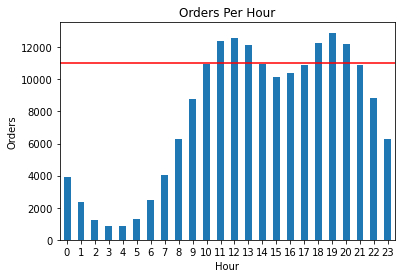

In [79]:
plt.axhline(y = 11000, color = 'r')
hoursales.plot(kind = 'bar', rot = 0, xlabel = 'Hour', ylabel = 'Orders', title = 'Orders Per Hour')

A. Most orders are made between 11:00 - 13:00 and 18:00 - 20:00, therefore to increase sales it might be effective to increase advertising during these times

### Q. What products are most often sold together?

#### Solution 1: This was my original solution

In [80]:
cd.index

Index(['141234', '141235', '141236', '141237', '141238', '141239', '141240',
       '141241', '141242', '141243',
       ...
       '319661', '319662', '319663', '319664', '319665', '319666', '319667',
       '319668', '319669', '319670'],
      dtype='object', name='Order ID', length=185950)

In [81]:
cd.index.nunique()

178437

In [82]:
mask = cd.index.duplicated(keep = False)
#so = Same Order ID
so = cd[mask]
so

,Product,Quantity Ordered,Price Each,Order Value,Order Date,Month Name,Purchase Address,City
Order ID,,,,,,,,
141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,January,"610 Walnut St, Austin, TX 73301",Austin (TX)
141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,January,"610 Walnut St, Austin, TX 73301",Austin (TX)
141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,January,"4 1st St, Los Angeles, CA 90001",Los Angeles (CA)
141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,January,"4 1st St, Los Angeles, CA 90001",Los Angeles (CA)
141365,Wired Headphones,1,11.99,11.99,2019-01-10 11:19:00,January,"20 Dogwood St, New York City, NY 10001",New York City (NY)
...,...,...,...,...,...,...,...,...
319584,Wired Headphones,1,11.99,11.99,2019-12-11 00:30:00,December,"537 Sunset St, Portland, OR 97035",Portland (OR)
319596,iPhone,1,700.00,700.00,2019-12-01 08:44:00,December,"436 14th St, New York City, NY 10001",New York City (NY)
319596,Lightning Charging Cable,1,14.95,14.95,2019-12-01 08:44:00,December,"436 14th St, New York City, NY 10001",New York City (NY)


In [83]:
so['Product'].nunique()

19

In [84]:
#mo = multiple orders
mo = so.groupby(by = 'Order ID')

In [85]:
len(mo)

7136

In [86]:
m = list(mo.groups.keys())

In [87]:
for i in range(5):
    print(m[i])

141275
141290
141365
141384
141450


In [88]:
test = mo.get_group('141275')
test

,Product,Quantity Ordered,Price Each,Order Value,Order Date,Month Name,Purchase Address,City
Order ID,,,,,,,,
141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,January,"610 Walnut St, Austin, TX 73301",Austin (TX)
141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,January,"610 Walnut St, Austin, TX 73301",Austin (TX)


In [89]:
test.iloc[0,0]

'USB-C Charging Cable'

In [90]:
l = []
for i in range(len(test)):
    p = test.iloc[i,0]
    l.append(p)
    l.sort()
    s = ', '.join(l)
    
print(s)

USB-C Charging Cable, Wired Headphones


In [91]:
#co = collated orders
co = []
for order in m:
    t = mo.get_group(order)
    l = []
    for i in range(len(t)):
        p = t.iloc[i,0]
        l.append(p)
        l.sort()
        s = ', '.join(l)
    co.append(s)

In [92]:
len(co)

7136

In [93]:
co = pd.Series(co)
co

0                 USB-C Charging Cable, Wired Headphones
1        AA Batteries (4-pack), Apple Airpods Headphones
2                      Vareebadd Phone, Wired Headphones
3                     Google Phone, USB-C Charging Cable
4               Bose SoundSport Headphones, Google Phone
                              ...                       
7131                Macbook Pro Laptop, Wired Headphones
7132                      Google Phone, Wired Headphones
7133                            Wired Headphones, iPhone
7134                    Lightning Charging Cable, iPhone
7135    34in Ultrawide Monitor, Lightning Charging Cable
Length: 7136, dtype: object

In [94]:
co.value_counts().head(10)

Lightning Charging Cable, iPhone                   891
Google Phone, USB-C Charging Cable                 868
Wired Headphones, iPhone                           374
USB-C Charging Cable, Vareebadd Phone              318
Google Phone, Wired Headphones                     311
Apple Airpods Headphones, iPhone                   299
Bose SoundSport Headphones, Google Phone           169
Vareebadd Phone, Wired Headphones                  110
AA Batteries (4-pack), Lightning Charging Cable    103
Lightning Charging Cable, USB-C Charging Cable      96
dtype: int64

A. The products that are sold the most often together are;

'Lightning Charging Cable, iPhone'

'Google Phone, USB-C Charging Cable'

It is mostly a combination of phones and chargers and phones and headphones

An extra bit of analysis that could be carried out would be to map the product names to their general type, such as a phone, charging cable or headphones. That would then enable you to get a further understanding of the overall general types of products that are sold together

#### Solution 2 - Alternative solution found after reviewing my code

This method used a solution from stack overflow and includes product combinations in orders where two or more items where purchased together

In [95]:
co

0                 USB-C Charging Cable, Wired Headphones
1        AA Batteries (4-pack), Apple Airpods Headphones
2                      Vareebadd Phone, Wired Headphones
3                     Google Phone, USB-C Charging Cable
4               Bose SoundSport Headphones, Google Phone
                              ...                       
7131                Macbook Pro Laptop, Wired Headphones
7132                      Google Phone, Wired Headphones
7133                            Wired Headphones, iPhone
7134                    Lightning Charging Cable, iPhone
7135    34in Ultrawide Monitor, Lightning Charging Cable
Length: 7136, dtype: object

In [96]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in co:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('Lightning Charging Cable', 'iPhone') 1015
('Google Phone', 'USB-C Charging Cable') 999
('Wired Headphones', 'iPhone') 462
('Google Phone', 'Wired Headphones') 423
('Apple Airpods Headphones', 'iPhone') 373
('USB-C Charging Cable', 'Vareebadd Phone') 368
('Bose SoundSport Headphones', 'Google Phone') 228
('USB-C Charging Cable', 'Wired Headphones') 205
('Vareebadd Phone', 'Wired Headphones') 149
('Lightning Charging Cable', 'Wired Headphones') 129


A. Roughly the same findings were found as in the first solution however some of the rankings of the phone/headphones and phone/cable combinations switched round using this method.

In [97]:
cd.to_csv('./Output/AllMonthsV1.csv')